In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.applications.vgg16 import VGG16
from keras.models import Sequential, Model
from keras.layers import Input, Activation, Dropout, Flatten, Dense
from keras.preprocessing import image
import numpy as np

def predictDogOrCat(file):
    '''
    画像を読み込んでVGG16とFC層で予測する
    file：対象の画像のディレクトリ
    '''
    img_h, img_w = 150, 150
    channels = 3

    # VGG16モデルと学習済み重みを読み込む
    vgg16_model = VGG16(
        include_top=False,
        weights='imagenet',
        input_shape=(img_h, img_w, channels) # 入力データの形状
    )

    # FCネットワークの作成
    fc_model = Sequential()
    # Flatten　全結合層への入力を4階テンソルから2階テンソルに変換する
    fc_model.add(Flatten(input_shape=vgg16_model.output_shape[1:]))
    # 全結合層
    fc_model.add(Dense(256, activation='relu'))
    fc_model.add(Dropout(0.5))
    # 出力層
    fc_model.add(Dense(1, activation='sigmoid'))
    # 学習済みの重みをロード
    fc_model.load_weights('weight.h5')

    # V入力側にVGG16、出力側にFCを配置したモデルを生成
    model = Model(
        # 入力層としてvgg16_modelの入力層を指定
        inputs=vgg16_model.input,
        # 出力層としてfc_modelの出力層を指定
        # その際にfc_modelの入力側としてvgg16_model.outputを設定
        outputs=fc_model(vgg16_model.output)
    )

    # モデルのコンパイル
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    # 画像のディレクトリを取得
    filename = file
    # 画像を読み込む
    img = image.load_img(
        filename,
        target_size=(img_h, img_w))
    # (height, width, channel)の3階テンソルに変換
    x = image.img_to_array(img)
    # 4階テンソルに変換
    x = np.expand_dims(x, axis=0)
    # RGB値を0.0～1.0の範囲に変換
    x = x / 255.0
    
    # モデルに入力して予測する
    # 入力は1枚の画像なのでx[0]のみ
    pred = model.predict(x[0:])
    # 0.5以上はイヌ、0.5より小さければネコ
    if pred >= 0.5:
        print(pred, '-> dog!')
    else:
        print(pred, '-> cat!')

    # 画像を描画
    img = mpimg.imread(file)
    plt.axis('off')
    imgplot = plt.imshow(img)

Using TensorFlow backend.


[[0.9431455]] -> dog!


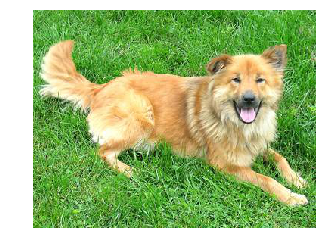

In [2]:
predictDogOrCat('test1/4.jpg')

[[0.3951358]] -> cat!


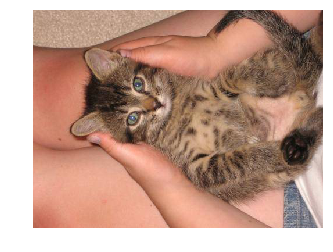

In [3]:
predictDogOrCat('test1/6.jpg')

[[0.02347683]] -> cat!


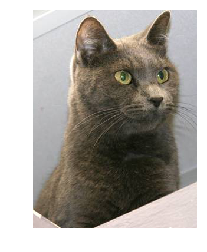

In [4]:
predictDogOrCat('test1/11.jpg')

[[0.9709254]] -> dog!


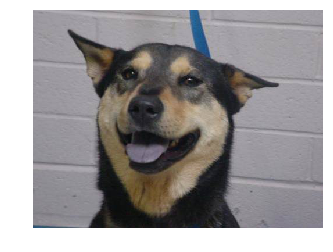

In [5]:
predictDogOrCat('test1/27.jpg')